# Project Overview
In today's digital age, social media has become a pivotal platform for brands and businesses to connect with their audience. However, with the vast amount of content being shared daily, it is crucial to optimize social media strategies to stand out and engage effectively. This project, titled "Optimizing Social Media Engagement: A Data-Driven Approach", aims to leverage data analytics to enhance the performance of social media posts across various categories such as health, family, food, and more. 

# Importance of Social Media Analytics
Social media analytics involves the collection and analysis of data from social media platforms to inform business decisions. By understanding how different types of content perform, businesses can tailor their strategies to maximize reach and engagement. This not only helps in building a stronger online presence but also in achieving specific marketing goals such as increased brand awareness, customer loyalty, and sales. 

# Scope and Goals
The primary objective of this project is to increase client reach and engagement by providing valuable insights derived from social media data.

The specific goals include: 
Collecting and Cleaning Data: Extracting tweets from various categories and ensuring the data is clean and ready for analysis. 
Analyzing Engagement Metrics: Evaluating key metrics such as likes, retweets, replies, and quotes to understand content performance. 
Visualizing Data: Creating visual representations of the data to identify trends and patterns. 
Providing Recommendations: Making data-driven recommendations to clients to improve their social media performance. 

By achieving these goals, the project aims to help clients optimize their social media strategies, deliver content more effectively, and achieve faster, more impactful results. 

In [35]:
# !pip install plotly

# Import the needed libraries

In [36]:
import pandas as pd
import numpy as np
import random
import plotly.express as px
import plotly.graph_objects as go
import functools

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp


In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/oprah-winfrey-s-twitter-engagement-metrics")


In [38]:
df = pd.read_csv("/kaggle/input/oprah-winfrey-s-twitter-engagement-metrics/Oprah.csv")

In [39]:
df.head()

,content,created_at,date,likeCount,media,outlinks,quoteCount,quotedTweet,replyCount,retweetCount,retweetedTweet,url,id,conversationId
0,@ ava you sure made us wait long enough # Nova #QueenSugar,Wed Nov 30 02:25:24 +0000 2022,2022-11-30 02:25:24+00:00,684,NaN,[],12,NaN,575,78,NaN,https://twitter.com/Oprah/status/1597778792218386433,1597778792218386433,1597778792218386433
1,@ava You sure made us waitling enough,Wed Nov 30 02:23:48 +0000 2022,2022-11-30 02:23:48+00:00,134,NaN,[],0,NaN,14,14,NaN,https://twitter.com/Oprah/status/1597778392178270209,1597778392178270209,1597778392178270209
2,@ava so great bringing Glynn Thurman back. Sweet 😘 #queensugar,Wed Nov 30 02:00:41 +0000 2022,2022-11-30 02:00:41+00:00,107,NaN,[],1,NaN,9,7,NaN,https://twitter.com/Oprah/status/1597772574494101504,1597772574494101504,1597772574494101504
3,@theSheenaB 90 min episode tonight y’all!,Wed Nov 30 01:37:08 +0000 2022,2022-11-30 01:37:08+00:00,10,NaN,[],0,NaN,6,2,NaN,https://twitter.com/Oprah/status/1597766647393026048,1597766647393026048,1597765324606418945
4,“All I do is regard you Darla”. I think Ralph Angel has been pretty understanding about the ex . #QueenSugar,Wed Nov 30 01:35:34 +0000 2022,2022-11-30 01:35:34+00:00,766,NaN,[],22,NaN,177,82,NaN,https://twitter.com/Oprah/status/1597766251920576514,1597766251920576514,1597766251920576514


In [40]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Add a new column 'Category' with random categories assigned to each row
df['Category'] = np.random.choice(categories, size=len(df))
df = df.sort_values(by='date').reset_index()

# Exploratory data analysis (EDA)

In [41]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==================================================")
    
    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))
    
    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])
    
    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df)
    
    print("==================================================")
    print("\nDescription of numerical variables")
    
    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))
    
    print("==================================================")
    print("\nDescription of categorical variables")
    
    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))
    
    return


basic_eda(df)

Info : There are 16 columns in the dataset
Info : There are 12069 rows in the dataset

Data type information of different columns
Info : There are 8 categorical columns
Info : There are 8 numerical columns
Categorical columns :  ['content', 'created_at', 'date', 'media', 'outlinks', 'quotedTweet', 'url', 'Category']
Numerical columns :  ['index', 'likeCount', 'quoteCount', 'replyCount', 'retweetCount', 'retweetedTweet', 'id', 'conversationId']


,column_name,dtype
0,index,int64
1,content,object
2,created_at,object
3,date,object
4,likeCount,int64
5,media,object
6,outlinks,object
7,quoteCount,int64
8,quotedTweet,object
9,replyCount,int64



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,index,12069.0,6034.000000,3484.164534,0.0,3017.0,6034.0,9051.0,12068.0
1,likeCount,12069.0,631.067943,5595.149545,0.0,4.0,29.0,198.0,402413.0
2,quoteCount,12069.0,11.750269,153.400108,0.0,0.0,0.0,0.0,9545.0
3,replyCount,12069.0,65.020217,200.871881,0.0,3.0,11.0,70.0,12550.0
4,retweetCount,12069.0,197.524319,1383.361456,0.0,3.0,20.0,133.0,93594.0



Description of categorical variables


,column_name,count,unique,top,freq
0,content,12069,12063,@3LWTV,2
1,created_at,12069,12027,Wed May 26 01:27:09 +0000 2021,4
2,date,12069,12027,2021-05-26 01:27:09+00:00,4
3,media,722,721,"[Video(thumbnailUrl='https://pbs.twimg.com/media/DLi0ra9VAAMDn4e.jpg', variants=[VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/916680236128911360/vid/320x180/23EY6-x8O2GlPz0h.mp4', bitrate=320000), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/916680236128911360/vid/1280x720/OTnzxTwDpvtc-wCW.mp4', bitrate=2176000), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/amplify_video/916680236128911360/vid/640x360/iaSuLnrvgVzpQ7Dl.mp4', bitrate=832000), VideoVariant(contentType='application/x-mpegURL', url='https://video.twimg.com/amplify_video/916680236128911360/pl/ItcApXPp2KVYa8NY.m3u8', bitrate=None)], duration=15.015, type='video')]",2
4,outlinks,12069,976,[],10944


# Data Cleaning

In [42]:
# Handling missing values
# df['age'].fillna(df['age'].mean(), inplace=True)

# Removing duplicates
# df.drop_duplicates(inplace=True)

In [43]:
# Remove any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()

#convert all column names in the DataFrame df to lowercase to ensures uniformity, making it easier to reference columns without worrying about case sensitivity.
df.columns = df.columns.str.lower()

df.columns

Index(['index', 'content', 'created_at', 'date', 'likecount', 'media',
       'outlinks', 'quotecount', 'quotedtweet', 'replycount', 'retweetcount',
       'retweetedtweet', 'url', 'id', 'conversationid', 'category'],
      dtype='object')

In [44]:
filtered_cols = ['created_at','content','category','likecount', 'quotecount',  'replycount', 'retweetcount']

# Keep only the related columns specified in 'filtered_cols'
df = df[filtered_cols]

In [45]:
df.head()

,created_at,content,category,likecount,quotecount,replycount,retweetcount
0,Fri Apr 17 14:11:03 +0000 2009,HI TWITTERS . THANK YOU FOR A WARM WELCOME. FEELING REALLY 21st CENTURY .,Culture,4251,46,120,2819
1,Fri Apr 17 14:20:24 +0000 2009,hi jimmy order a reuben for me.,Travel,490,2,10,365
2,Fri Apr 17 14:22:49 +0000 2009,hi everyone. sadie's great. gets her rabies vaccine today.,Family,76,0,6,9
3,Fri Apr 17 14:32:37 +0000 2009,little jordan is next. love this kid,Fashion,1159,720,488,479
4,Fri Apr 17 14:39:37 +0000 2009,george thats a promo not a tweet.,Health,128,0,9,5


In [46]:
# Standardizing date format
df[['created_at']] = df[['created_at']].apply(pd.to_datetime)
df[['category','content']] = df[['category','content']].astype(str)
df[['likecount','quotecount','replycount','retweetcount']] = df[['likecount','quotecount','replycount','retweetcount']].astype(int)

df.dtypes

<ipython-input-46-b70818eccbf8>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



created_at      datetime64[ns, UTC]
content                      object
category                     object
likecount                     int64
quotecount                    int64
replycount                    int64
retweetcount                  int64
dtype: object

# Feature engineering

In [47]:
#Extracting year from date
df['date'] = pd.to_datetime(df['created_at'].dt.date)
df['dayofweek'] = df['created_at'].dt.day_name()
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['hour'] = df['created_at'].dt.hour

# create the 'time_of_day' column
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'
df['time_of_day'] = df['hour'].apply(get_time_of_day)

# Dropping the original date column
df.drop('created_at', axis=1, inplace=True)

In [48]:

# Calculate Total Engagement Score for each tweet
df['total_engagement'] = df['likecount'] + df['quotecount'] + df['replycount'] + df['retweetcount']
# df['engagement_rate'] = df['total_engagement'] / df['impression']

# Calculate cumulative engagement for each category over time
df['cumulative_engagement'] = df.groupby('category')['total_engagement'].cumsum()


# Data Analysis and Visualization

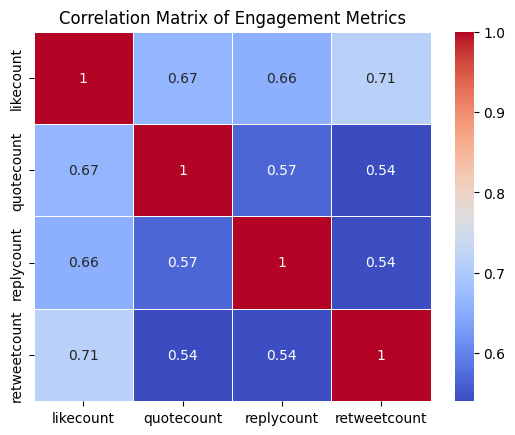

In [49]:
# Examine the relationships between different engagement metrics (likes, retweets, replies, quotes). Use a heatmap to visualize these correlations. 
correlation_matrix = df[[ 'likecount' , 'quotecount' , 'replycount' , 'retweetcount' ]].corr() 
 
# Heatmap for Correlation Matrix 
plt.figure() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Matrix of Engagement Metrics') 
plt.show() 


In [50]:
# Explore specific correlations [likes vs. retweets]
scatter_fig = px.scatter(df, x='likecount', y='retweetcount', color='category', title='Correlation on Likes vs. Retweets')
scatter_fig.show()

### Current Performance Analysis

In [51]:
# Calculate the sum of the specified columns
engagement_counts = df[['likecount', 'retweetcount', 'replycount', 'quotecount']].sum()

# Create a bar graph using Plotly
fig = px.bar(x=engagement_counts.index, y=engagement_counts.values, title='Total Engagement Counts', labels={'x': 'Engagement Type', 'y': 'Count'})
fig.update_layout(  width=600 ) 
fig.show()

### Content Performance

In [52]:
pd.set_option('display.max_colwidth', None)

In [53]:
# Identify and analyze the top-performing tweets in terms of likes, retweets, replies, and quotes
top_performing_tweets = df[['category','total_engagement','content']].nlargest(5, 'total_engagement')
print("\nOverall Top Performing Tweets:")
top_performing_tweets


Overall Top Performing Tweets:


,category,total_engagement,content
11106,Fashion,488628,"George and Amal, I couldn’t agree with you more. I am joining forces with you and will match your $500,000 donation to ‘March For Our Lives.’ These inspiring young people remind me of the Freedom Riders of the 60s who also said we’ve had ENOUGH and our voices will be heard."
11558,Fashion,292958,"Just got a phone call that my name is trending. And being trolled for some awful FAKE thing. It’s NOT TRUE. Haven’t been raided, or arrested. Just sanitizing and self distancing with the rest of the world. Stay safe everybody.🙏🏾"
11786,Food,255181,"I have never been prouder to see another young woman rise! Brava Brava, @TheAmandaGorman! Maya Angelou is cheering—and so am I. https://t.co/I5HLE0qbPs"
17,Culture,179790,no i'm not wearing a weave
11753,Fashion,93580,And so we RISE as Maya would remind us. Character rises. Decency rises. The Soul of America gets a reset. And it starts now: #BidenHarris 🇺🇸


In [54]:
top_liked_tweets = df[['category','likecount','content']].nlargest(5, 'likecount')
print("\nTop Liked Tweets:")
top_liked_tweets


Top Liked Tweets:


,category,likecount,content
11106,Fashion,402413,"George and Amal, I couldn’t agree with you more. I am joining forces with you and will match your $500,000 donation to ‘March For Our Lives.’ These inspiring young people remind me of the Freedom Riders of the 60s who also said we’ve had ENOUGH and our voices will be heard."
11558,Fashion,240994,"Just got a phone call that my name is trending. And being trolled for some awful FAKE thing. It’s NOT TRUE. Haven’t been raided, or arrested. Just sanitizing and self distancing with the rest of the world. Stay safe everybody.🙏🏾"
11786,Food,232838,"I have never been prouder to see another young woman rise! Brava Brava, @TheAmandaGorman! Maya Angelou is cheering—and so am I. https://t.co/I5HLE0qbPs"
11753,Fashion,85777,And so we RISE as Maya would remind us. Character rises. Decency rises. The Soul of America gets a reset. And it starts now: #BidenHarris 🇺🇸
17,Culture,82290,no i'm not wearing a weave


In [55]:
top_retweeted_tweets = df[['category','retweetcount','content']].nlargest(5, 'retweetcount')
print("\nTop Retweeted Tweets:")
top_retweeted_tweets


Top Retweeted Tweets:


,category,retweetcount,content
17,Culture,93594,no i'm not wearing a weave
11106,Fashion,73797,"George and Amal, I couldn’t agree with you more. I am joining forces with you and will match your $500,000 donation to ‘March For Our Lives.’ These inspiring young people remind me of the Freedom Riders of the 60s who also said we’ve had ENOUGH and our voices will be heard."
8279,Culture,43807,He
9411,Fitness,30518,"""All of us deserve the right to be loved for who we are "". Bravo #BruceJenner"
11558,Fashion,29869,"Just got a phone call that my name is trending. And being trolled for some awful FAKE thing. It’s NOT TRUE. Haven’t been raided, or arrested. Just sanitizing and self distancing with the rest of the world. Stay safe everybody.🙏🏾"


In [56]:
top_replied_tweets = df[['category','replycount','content']].nlargest(5, 'replycount')
print("\nTop Replied Tweets:")
top_replied_tweets


Top Replied Tweets:


,category,replycount,content
11558,Fashion,12550,"Just got a phone call that my name is trending. And being trolled for some awful FAKE thing. It’s NOT TRUE. Haven’t been raided, or arrested. Just sanitizing and self distancing with the rest of the world. Stay safe everybody.🙏🏾"
11106,Fashion,7701,"George and Amal, I couldn’t agree with you more. I am joining forces with you and will match your $500,000 donation to ‘March For Our Lives.’ These inspiring young people remind me of the Freedom Riders of the 60s who also said we’ve had ENOUGH and our voices will be heard."
11621,Fashion,4085,We’re doing dinner early so we can watch the ONE World concert with @LadyGaga &amp; @glblctzn at 8 PM EST across all the major networks. I think wine and music makes meal prep so much better. You agree? #TogetherAtHome https://t.co/7vUAdQSm1p
17,Culture,3303,no i'm not wearing a weave
11180,Fitness,3232,Babies torn from their parents.\nCan’t stand it! Will be watching\n@GayleKing and her colleaques LiVE from Texas. @CBSThisMorning 7am


In [57]:
top_quoted_tweets = df[['category','quotecount','content']].nlargest(5, 'quotecount')
print("\nTop Quoted Tweets:")
top_quoted_tweets


Top Quoted Tweets:


,category,quotecount,content
11558,Fashion,9545,"Just got a phone call that my name is trending. And being trolled for some awful FAKE thing. It’s NOT TRUE. Haven’t been raided, or arrested. Just sanitizing and self distancing with the rest of the world. Stay safe everybody.🙏🏾"
8279,Culture,7912,He
11703,Fitness,5158,"My next @oprahsbookclub pick, “Caste” by @Isabelwilkerson, should be required reading for humanity. It eloquently examines the unspoken caste system that has shaped America. Download a copy on @AppleBooks here: https://t.co/cAkzEPCFL3 #ReadWithUs https://t.co/9WAXk7QP9r"
11761,Health,5026,"Did y’all know that me and former President @BarackObama weren’t even in the same room for this interview? He was in D.C. and I was in California. But thanks to the power of technology (and @DrewBarrymore), now I may never leave my house 😂 https://t.co/ysNBpo7IEv"
11106,Fashion,4717,"George and Amal, I couldn’t agree with you more. I am joining forces with you and will match your $500,000 donation to ‘March For Our Lives.’ These inspiring young people remind me of the Freedom Riders of the 60s who also said we’ve had ENOUGH and our voices will be heard."


In [58]:

engagement_per_category = df.groupby('category').agg(
    total_likes=('likecount', 'sum'),
    total_retweets=('retweetcount', 'sum'),
    total_replies=('replycount', 'sum'),
    total_quotes=('quotecount', 'sum'),
    total_engagement=('total_engagement', 'sum'),
).reset_index()

# Comparing engagement metrics across different types of content category: what resonates most with client's audience
fig = px.bar(engagement_per_category.sort_values(by='total_engagement', ascending=False), x="category", y='total_engagement', title = "Category vs. Total Engagements" , width=700)
fig.show()



fig = sp.make_subplots(rows=2, cols=2, subplot_titles=('Likes', 'Retweets', 'Replies', 'Quotes'))

# Box plot for Likes
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_likes', ascending=False), x='category', y='total_likes').data[0], row=1, col=1)

# Box plot for Retweets
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_retweets', ascending=False), x='category', y='total_retweets').data[0], row=1, col=2)

# Box plot for Replies
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_replies', ascending=False), x='category', y='total_replies').data[0], row=2, col=1)

# Box plot for Quotes
fig.add_trace(px.bar(engagement_per_category.sort_values(by='total_quotes', ascending=False), x='category', y='total_quotes').data[0], row=2, col=2)

# Update layout
fig.update_layout(height=800, title_text="Distribution of Engagement Metrics Across Categories")
fig.show()

## Audience Interaction

In [59]:
# Calculate basic statistics for replies and quotes
total_replies = df['replycount'].sum()
average_replies = df['replycount'].mean()
median_replies = df['replycount'].median()

total_quotes = df['quotecount'].sum()
average_quotes = df['quotecount'].mean()
median_quotes = df['quotecount'].median()

print(f"Total Replies: {total_replies}")
print(f"Average Replies per Tweet: {average_replies}")
print(f"Median Replies per Tweet: {median_replies}")

print(f"\nTotal Quotes: {total_quotes}")
print(f"Average Quotes per Tweet: {average_quotes}")
print(f"Median Quotes per Tweet: {median_quotes}")

Total Replies: 784729
Average Replies per Tweet: 65.02021708509405
Median Replies per Tweet: 11.0

Total Quotes: 141814
Average Quotes per Tweet: 11.7502692849449
Median Quotes per Tweet: 0.0


> a few posts are getting a lot of replies/quotes while most are not

In [60]:
fig_replies_hist = px.histogram(df.groupby(['date'])['replycount'].sum().reset_index(), x='replycount', title='Distribution of Replies')
fig_replies_hist.show()

In [61]:
fig_replies_time_series = px.line(df.groupby(['year','date'])['replycount'].sum().reset_index(), x='date', y='replycount', color='year', title='Replies Over Time')
fig_replies_time_series.show()

In [62]:
fig_replies_hist = px.histogram(df.groupby(['date'])['quotecount'].sum().reset_index(), x='quotecount', title='Distribution of Quotes')
fig_replies_hist.show()

In [63]:
fig_replies_time_series = px.line(df.groupby(['year','date'])['quotecount'].sum().reset_index(), x='date', y='quotecount', color='year', title='Quotes Over Time')
fig_replies_time_series.show()

## Trend Analysis

In [64]:
engagement_overtime = px.line(df.groupby(['date'])['total_engagement'].sum().reset_index(), x='date', y='total_engagement', title='Engagements Over Time')
engagement_overtime.show()

There is an upward trend in engagagement over time which suggests growing engagement and interest in our client's content.

In [93]:

melted_df_hour = df[['hour','likecount','quotecount','replycount','retweetcount']].melt(id_vars=['hour'], var_name='metrics', value_name='count')


fig = px.bar(melted_df_hour.groupby(['hour','metrics'])['count'].sum().reset_index(), x='hour', y='count', color='metrics',title='Engagement by Hour') 
fig.update_layout( 
    xaxis_title='Hour', 
    yaxis_title='Engagement Count', 
)

fig.show()


In [67]:
melted_df_week = df[['dayofweek','likecount','quotecount','replycount','retweetcount']].melt(id_vars=['dayofweek'], var_name='metrics', value_name='count')

fig = px.bar(melted_df_week.groupby(['dayofweek','metrics'])['count'].sum().reset_index(), x='dayofweek', y='count', color='metrics',title='Weekday Distribution') 
fig.update_layout( 
    xaxis_title='Weekday', 
    yaxis_title='Engagement Count',
    width = 800
)
fig.show()

In [85]:
engagement_pivot = df.pivot_table(values='total_engagement', index='dayofweek', columns='hour', aggfunc='sum').fillna(0)


fig = go.Figure(data=go.Heatmap( z=engagement_pivot.values,x=engagement_pivot.columns,y=engagement_pivot.index,colorscale='YlGnBu'))
fig.update_layout( title='Engagement Patterns by Day and Hour',xaxis_title='Hour of Day', yaxis_title='Day of Week')
fig.show()

In [94]:
# Find the most engaged day and time
max_engagement = engagement_pivot.max().max()
most_engaged_time = engagement_pivot.stack().idxmax()

most_engaged_day = most_engaged_time[0]
most_engaged_hour = most_engaged_time[1]

print(f"The most engaged day is {most_engaged_day} and the most engaged hour is {most_engaged_hour} with a total engagement of {max_engagement}.")

The most engaged day is Tuesday and the most engaged hour is 22 with a total engagement of 559124.0.
